# ANLY-590 Assignment 3

## 1. Autoencoder

In [4]:
# Import required package:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist as mnist
import numpy as np
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D,Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [1]:
# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


4423680/4422102 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)


In [3]:
def get_model():
        input_img = Input(shape=(28, 28, 1))# adapt this if using `channels_first` image data format

        x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
        x = MaxPooling2D((2, 2), padding='same')(x)
        x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
        x = MaxPooling2D((2, 2), padding='same')(x)
        x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
        encoded = MaxPooling2D((2, 2), padding='same')(x)

        # at this point the representation is (4, 4, 8) i.e. 128-dimensional
        
        x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
        x = UpSampling2D((2, 2))(x)
        x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
        x = UpSampling2D((2, 2))(x)
        x = Conv2D(16, (3, 3), activation='relu')(x)
        x = UpSampling2D((2, 2))(x)
        decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

        autoencoder_model = Model(input_img, decoded)
        return autoencoder_model

In [4]:
# normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [8]:
model = get_model()
model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()


model.fit(x_train, x_train,
          epochs=5,
          batch_size=128,
          shuffle=True,
          validation_data=(x_test, x_test))

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 8)           0   

In [9]:
model.save_weights("autoencoder.h5", overwrite=True)

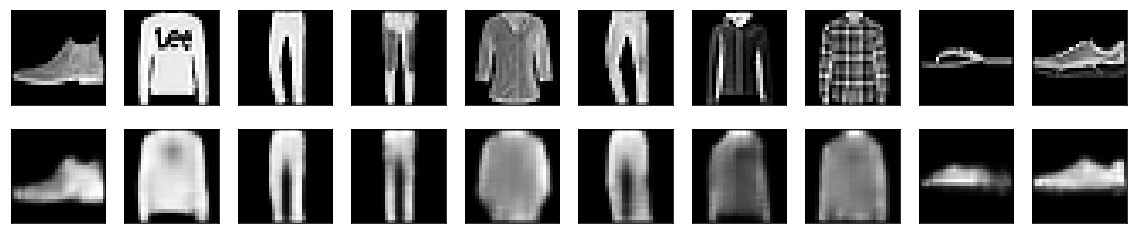

In [11]:
decoded_imgs = model.predict(x_test)
n=10
plt.figure(figsize=(n*2, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 2. Image Classification

We’ll continue to use the Fashion MNIST dataset and build a deep convolutional network for classification.

### 2.1 Deep CNN

Build a deep CNN to classify the images. Provide a brief description of the architectural choices you’ve made: kernel sizes, strides, padding, network depth. Train your network end-to-end. Report on your model’s performance on training set and test set.


In [16]:
def get_model_1():
        input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

        x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
        x = MaxPooling2D((2, 2), padding='same')(x)
        x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
        x = MaxPooling2D((2, 2), padding='same')(x)
        x = Flatten()(x)
        output = Dense(10,activation="softmax")(x)
        return Model(input_img,output)

In [13]:
from tensorflow.keras.datasets import fashion_mnist as mnist
from tensorflow.keras.utils import to_categorical
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train,(len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [14]:
x_train.shape

(60000, 28, 28, 1)

In [19]:
model = get_model_1()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history_dnn = model.fit(x_train, y_train,
                       epochs=5,
                       batch_size=128,
                       shuffle=True,
                       validation_data=(x_test, y_test))

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1569

In [18]:
model.save_weights("CVCNN.h5", overwrite=True)

#### From the output of model fitting, we can conclude that the best CNN model achieves 89.17% accuracy on training set, and 88.71% on test set.

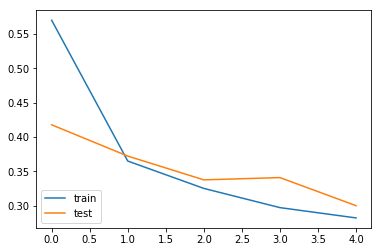

In [20]:
plt.plot(history_dnn.history['loss'])
plt.plot(history_dnn.history['val_loss'])
plt.legend(['train', 'test'], loc='lower left')

### 2.2 Transfer Learning


Repeat the same task, but this time utilize a pre-trained network for the major- ity of your model. You should only train the final Dense layer, all other weights should be fixed. You can use whichever pre-trained backbone you like (ResNet, VGG, etc). Report on your model’s performance on training set and test set.


In [25]:
!pip install opencv-python

     |████████████████████████████████| 45.2MB 3.6MB/s eta 0:00:012   |██▊                             | 3.8MB 2.0MB/s eta 0:00:21     |███████████████████████████████▍| 44.3MB 3.6MB/s eta 0:00:01


In [26]:
import cv2
from tensorflow.keras.applications.vgg16 import VGG16

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# converting it to RGB
x_train = [cv2.cvtColor(cv2.resize(i, (32,32)), cv2.COLOR_GRAY2BGR) for i in x_train]
x_train = np.concatenate([arr[np.newaxis] for arr in x_train]).astype('float32')

x_test = [cv2.cvtColor(cv2.resize(i, (32,32)), cv2.COLOR_GRAY2BGR) for i in x_test]
x_test = np.concatenate([arr[np.newaxis] for arr in x_test]).astype('float32')

In [27]:
## build the model

model_vgg16_conv = VGG16(weights='imagenet', include_top=False)
# Make vgg16 model layers as non trainable
for layer in model_vgg16_conv.layers:
    layer.trainable = False

input_img = Input(shape=(32,32,3))
output_vgg16_conv = model_vgg16_conv(input_img)

# Add fully-connected layers 
x = Flatten()(output_vgg16_conv)
x = Dense(300, activation='relu')(x)
x = Dense(100, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

pretrained_model = Model(inputs=input_img, outputs=x)

## compile
pretrained_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## fit
history_transder = pretrained_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=2)

58892288/58889256 [==============================] - 9s 0us/step
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 371s 6ms/sample - loss: 0.6421 - acc: 0.7984 - val_loss: 0.4649 - val_acc: 0.8323
Epoch 2/2
60000/60000 [==============================] - 326s 5ms/sample - loss: 0.4209 - acc: 0.8464 - val_loss: 0.4615 - val_acc: 0.8343


#### From the output of model fitting, we can conclude that the best CNN model achieves84.64% accuracy on training set, and 83.43% on test set.

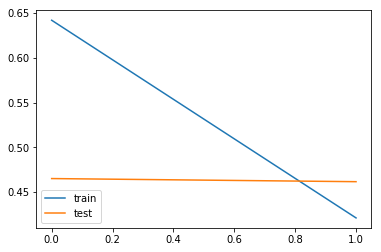

In [28]:
plt.plot(history_transder.history['loss'])
plt.plot(history_transder.history['val_loss'])
plt.legend(['train', 'test'], loc='lower left')

## 3. Text Classification

While images contain local spatial correlations and structure, many other datasets contain temporal correlations. Examples include time series and discrete se- quences such as text. In this problem, we will tackle the task of text classifica- tion in the context of natural language.

**Background**. In this problem, we will build models that read short text segments (tweets) and identify if one or more specific topics are being discussed. 


**Dataset**. The dataset consists of tweets along with labels for which topics were being referenced in the tweet. Examples of the topics include ”storms”, ”rain”, ”hurricane”, ”snow” and so on. Unlike previous classification problems we have encountered, in this dataset, there is not just a single right answer. The labels here are derived from multiple annotators decided how to label each tweet, so a single tweet can be about more than one topic. The label is the fraction of annotations for a given topic, and each row should sum to 1.

What Loss function should you use here? Categorical CrossEntropy might work, but with some modification since we don’t have ”hard” labels over the categories. Another option might be sigmoid: for each output category, use a sigmoid to collapse the output to between 0 and 1, but each category output can be roughly independent of the others. In the problems below, feel free to
try both.

### 3.1 RNN


Build and train a Recurrent Neural Network to solve this text classification task. You can use any type of RNN you wish (SimpleRNN, GRU, LSTM).

In [1]:
# Load data
import pandas as pd
import re
from sklearn.model_selection import train_test_split

df = pd.read_csv('tweets_with_labels.csv',sep='\t',error_bad_lines=False)
df.dropna()

# get labels for our dataset
df_labels = df[['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9','k10', 'k11', 'k12', 'k13', 'k14', 'k15']]

# preprocessing function
def preprocess_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

# preprocessing
corpus = list(df["tweet"])
X = [preprocess_text(sen) for sen in corpus]
y = df_labels.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# tokenizer and convert to input
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1
# Max number of words
max_features = 10000

max_len = 64

X_train = pad_sequences(X_train, padding='post', maxlen=max_len)
X_test = pad_sequences(X_test, padding='post', maxlen=max_len)

In [6]:
from tensorflow.keras.layers import LSTM,Embedding

def get_model(max_features,max_len):
    input_sen = Input(shape=(max_len,))
    x = Embedding(max_features, 32)(input_sen)
    x = LSTM(32)(x)
    output = Dense(15, activation='sigmoid')(x)
    return Model(input_sen,output)

In [12]:
model = get_model(max_features,max_len)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history_3_1 = model.fit(X_train, y_train,
               epochs=20,
               batch_size=64,
               shuffle=True,
               validation_data=(X_test, y_test))
model.save_weights("TextLSTM.h5", overwrite=True)

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 64)]              0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 64, 32)            320000    
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_5 (Dense)              (None, 15)                495       
Total params: 328,815
Trainable params: 328,815
Non-trainable params: 0
_________________________________________________________________
Train on 54562 samples, validate on 23384 samples
Epoch 1/20
54562/54562 [==============================] - 41s 760us/sample - loss: 2.7051 - acc: 0.2882 - val_loss: 2.6776 - val_acc: 0.2875
Epoch 2/20
54562/54562 [==============================] - 41

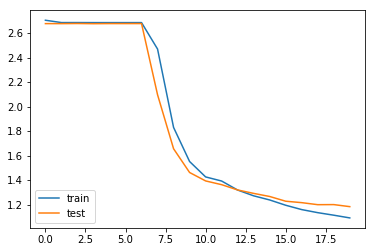

In [13]:
import matplotlib.pyplot as plt
plt.plot(history_3_1.history['loss'])
plt.plot(history_3_1.history['val_loss'])
plt.legend(['train', 'test'], loc='lower left')

**The best LSTM model: 83.33% on training set, 81.20% on test set**

### 3.2 CNN
Build and train a 1D CNN for this text classification task. We recommend you do a character-level convolution (with character embeddings). You might gain some insight and inspiration from these text classification approaches:

http://www.aclweb.org/anthology/D14-1181 

https://arxiv.org/abs/1702.08568

In [24]:
from tensorflow.keras.layers import Dropout,Conv1D,GlobalMaxPooling1D

def get_model(max_features,max_len):
    input_sen = Input(shape=(max_len,))
    x = Embedding(max_features, 32)(input_sen)
    x = Conv1D(64,3,padding='same',activation='relu',strides=1)(x)
    x = GlobalMaxPooling1D()(x)
    x = Dense(150,activation="relu")(x)
    output = Dense(15, activation='sigmoid')(x)
    return Model(input_sen,output)

In [25]:
model_2 = get_model(max_features,max_len)
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_2.summary()
history_3_2 = model_2.fit(X_train, y_train,
               epochs=5,
               batch_size=64,
               shuffle=True,
               validation_data=(X_test, y_test))
model_2.save_weights("TextCNN.h5", overwrite=True)

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 64)]              0         
_________________________________________________________________
embedding_6 (Embedding)      (None, 64, 32)            320000    
_________________________________________________________________
conv1d (Conv1D)              (None, 64, 64)            6208      
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 150)               9750      
_________________________________________________________________
dense_7 (Dense)              (None, 15)                2265      
Total params: 338,223
Trainable params: 338,223
Non-trainable params: 0
_____________________________________________________

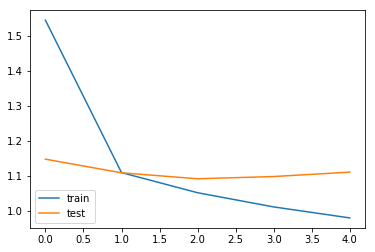

In [26]:
import matplotlib.pyplot as plt
plt.plot(history_3_2.history['loss'])
plt.plot(history_3_2.history['val_loss'])
plt.legend(['train', 'test'], loc='lower left')

**The best LSTM model: 97.90% on training set, 84.94% on test set**

### 3.3

Be sure to directly compare your two methods with an ROC curve or similar validation method. Don’t forget to create a train-test split.

In [23]:
pred_3_1 = model.predict(X_test)

In [27]:
pred_3_2 = model_2.predict(X_test)

In [28]:
from sklearn.metrics import roc_curve, auc
# function for plot roc
def plot_roc(test_TL,test_TC,test_target,i):
    fprl, tprl, _ = roc_curve(test_target,test_TL)
    fprc, tprc,_ = roc_curve(test_target,test_TC)
    plt.figure()
    lw = 0.5
    plt.plot(fprl, tprl, color='blue',
             lw=lw, label='ROC curve for LSTM (area = %0.2f)' % auc(fprl,tprl))
    plt.plot(fprc, tprc, color='red',
             lw=lw, label='ROC curve for CNN (area = %0.2f)' % auc(fprc,tprc))
    plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
    plt.xlim([-0.02, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for label k%s' % str(i+1))
    plt.legend(loc="lower right")
    plt.show()

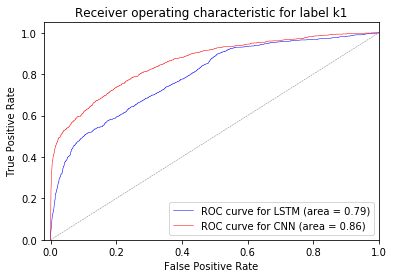

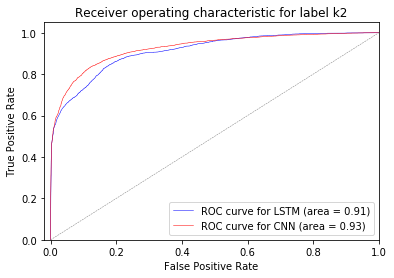

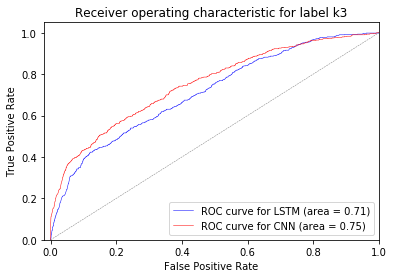

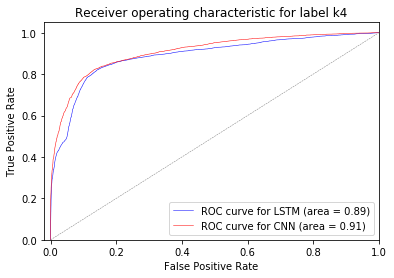

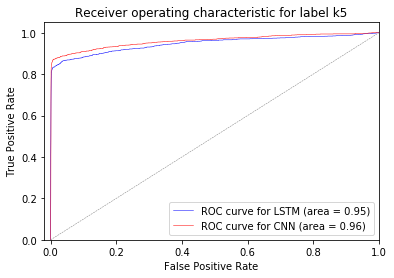

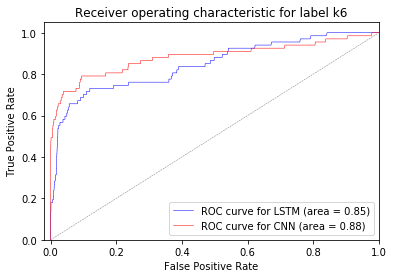

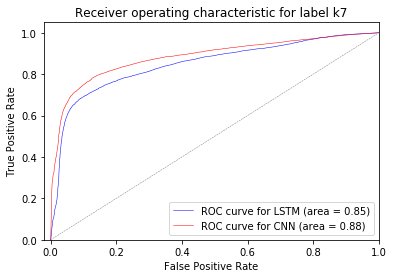

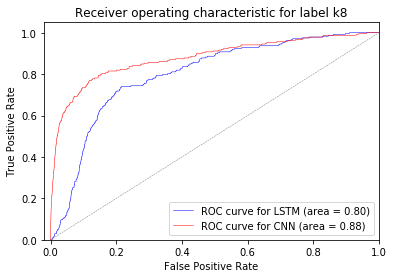

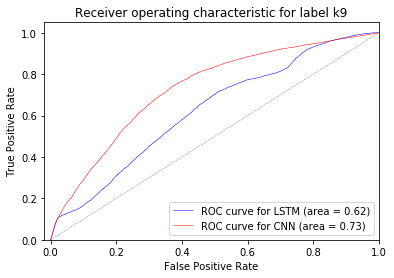

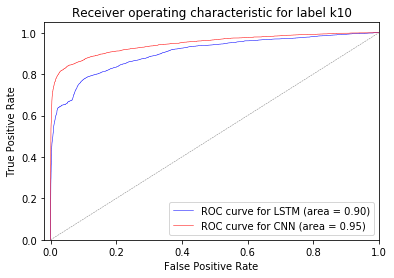

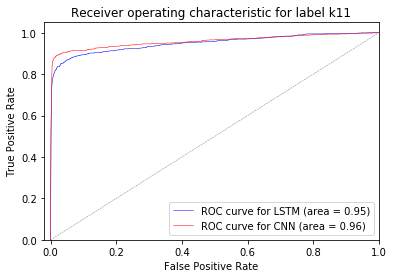

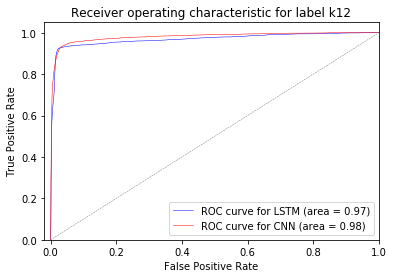

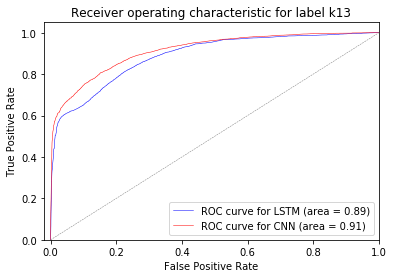

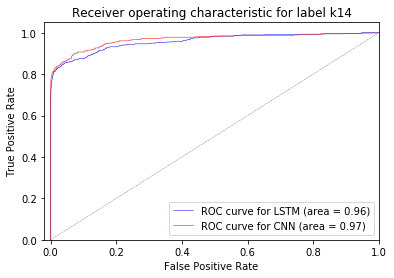

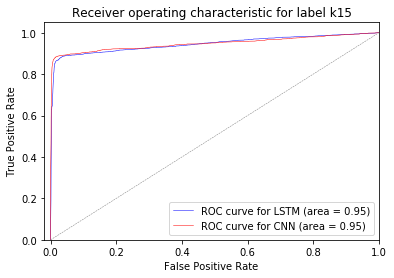

In [29]:
for i in range(15):
    test_3_1 = pred_3_1[:,i]
    test_3_2 = pred_3_2[:,i]
    test_target = y_test[:,i]>0
    plot_roc(test_3_1,test_3_2,test_target,i)

Therefore, we can conclude from the result: LSTM model converges much slower than CNN model. The ROC curve of the 15 labels indicates that CNN outperforms LSTM in most cases.